In [124]:
import pandas as pd
import numpy as np
from datetime import datetime

파일 불러오기

In [336]:
smart_farm = pd.read_csv("smart_farm.csv")
columns = pd.read_csv("(스마트팜)테이블 정의서.csv")

컬럼명 재정의

In [337]:
smart_farm.columns = list(columns["정의"])
smart_farm.head()

,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),풍속(m/s),풍향(º),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021,11,26,0,3,-3.0,5.7,67,1.3,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021,11,26,0,4,-2.8,5.7,67,0.9,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


### Datetime 생성
- 년 월 일 시 분 합치기
- 링크 : https://www.daleseo.com/python-datetime/

In [338]:
time_lst = []
ymd_lst = []

for idx, row in smart_farm.iterrows():
    date = datetime(int(row["년도"]), int(row["월"]), int(row["일"]), int(row["시"]), int(row["분"]))
    time_lst.append(date)
    
    ymd = datetime(int(row["년도"]), int(row["월"]), int(row["일"]))
    ymd_lst.append(ymd)
    
smart_farm["시간"] = time_lst
smart_farm["년월일"] = ymd_lst

In [339]:
smart_farm = smart_farm[["시간","년월일","년도",'월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)', '풍속(m/s)',
       '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)', '에너지스크린(수평)',
       '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동', '환기온도(천창 제어온도)',
       '난방온도(설정온도)', '열공급량(kWh)']]

In [340]:
smart_farm.columns

Index(['시간', '년월일', '년도', '월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)', '열공급량(kWh)'],
      dtype='object')

In [341]:
smart_farm.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


시간 column -> 고유 PK로 설정가능

In [342]:
smart_farm[smart_farm["시간"].duplicated()]

smart_farm_df = smart_farm.set_index("시간")

### 결측치 확인
- y값 결측 확인
- x값 결측 확인

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

In [344]:
smart_farm.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도              512
내부 습도              512
차광스크린(수평)          512
차열스크린(수평)          512
에너지스크린(수평)         512
에너지스크린(수직)         512
배기팬                512
천창                 512
유동팬                512
팬코일 B동             512
환기온도(천창 제어온도)      501
난방온도(설정온도)         500
열공급량(kWh)        21075
dtype: int64

### 1) y값 결측치 확인
- 검증데이터와 학습데이터 분리
- 검증기간 : 2021.12.26~2022.01.01(1주)
- 검증기간 : 2022.01.23~2022.01.29(1주)

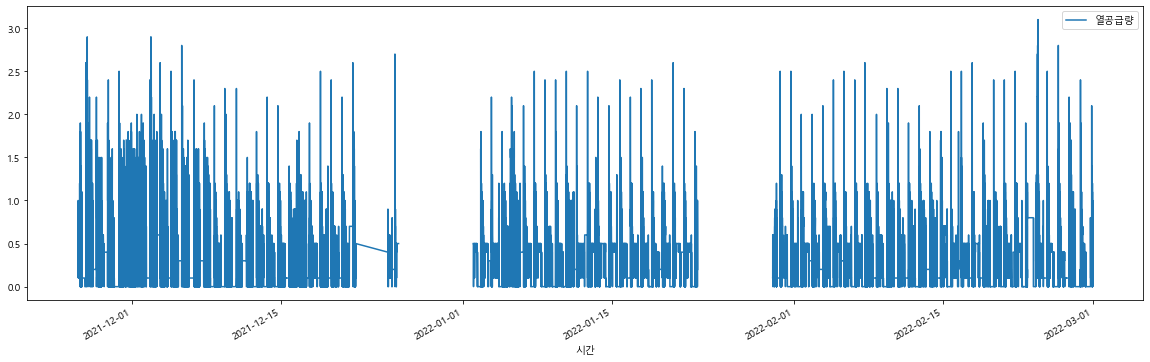

In [345]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
smart_farm_df["열공급량(kWh)"].plot(ax=ax,label="열공급량")
plt.legend()

학습데이터와 검증데이터분리
- datetime 날짜구간 행 출력 : https://www.delftstack.com/ko/howto/python-pandas/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/

In [346]:
range1 = pd.date_range(start="2021-12-26",end="2022-01-01")
range2 = pd.date_range(start="2022-01-23",end="2022-01-29")

smart_farm_df = smart_farm_df.reset_index()

In [347]:
smart_farm_df.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


검증용 데이터
- 12월 26일 ~ 1월 1일(1주) 예측용
- 1월 23일 ~ 1월 29일(1주) 예측용

In [348]:
test_df = smart_farm_df[(smart_farm_df["년월일"].isin(range1)) | (smart_farm_df["년월일"].isin(range2))]
test_df.reset_index(drop=True,inplace=True)
test_df

# 20160개의 데이터

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-12-26 00:00:00,2021-12-26,2021,12,26,0,0,-3.2,-5.9,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
1,2021-12-26 00:01:00,2021-12-26,2021,12,26,0,1,-3.4,-6.0,34,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
2,2021-12-26 00:02:00,2021-12-26,2021,12,26,0,2,-3.3,-5.9,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
3,2021-12-26 00:03:00,2021-12-26,2021,12,26,0,3,-3.3,-6.0,34,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
4,2021-12-26 00:04:00,2021-12-26,2021,12,26,0,4,-3.6,-6.0,34,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,2022-01-29 23:55:00,2022-01-29,2022,1,29,23,55,-2.1,1.7,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
20156,2022-01-29 23:56:00,2022-01-29,2022,1,29,23,56,-2.2,1.7,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
20157,2022-01-29 23:57:00,2022-01-29,2022,1,29,23,57,-2.3,1.7,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
20158,2022-01-29 23:58:00,2022-01-29,2022,1,29,23,58,-2.3,1.6,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN


학습용 데이터
- 특정 행만 제거하기

In [349]:
train_df = smart_farm_df[(-smart_farm_df["년월일"].isin(range1)) & (-smart_farm_df["년월일"].isin(range2))]
train_df.reset_index(drop=True,inplace=True)
train_df.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


학습용 데이터 null 값 확인

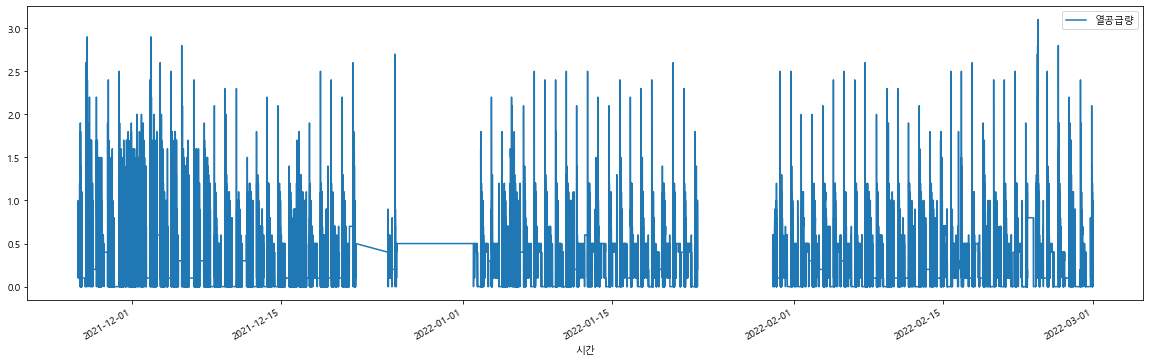

In [350]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
train_df.set_index("시간")["열공급량(kWh)"].plot(ax=ax,label="열공급량")
plt.legend()

In [351]:
# Y값이 결측인 행 915개
len(train_df[train_df["열공급량(kWh)"].isnull()])

915

결측치가 존재하는 년월일 추출하기
- 해당 년월일의 데이터들만 확인하기
- 결측치와 공존하는 데이터가 어떤 양상인지
- null_ymd_df : 결측이 존재하는 년월일 데이터 전부

In [352]:
# null_ymd : 결측이 존재하는 년월일 리스트
null_ymd = train_df[train_df["열공급량(kWh)"].isnull()]["년월일"].value_counts().index
null_ymd

DatetimeIndex(['2022-02-19', '2022-02-26', '2021-12-17', '2022-01-20',
               '2022-01-30', '2022-02-12', '2022-01-18', '2021-12-15',
               '2022-02-18', '2022-02-20', '2022-02-21', '2022-02-22',
               '2021-12-16', '2021-11-30', '2021-12-19', '2022-02-07',
               '2022-01-09', '2022-01-10', '2022-02-05', '2021-11-27'],
              dtype='datetime64[ns]', freq=None)

In [353]:
null_ymd_df = smart_farm_df[(smart_farm_df["년월일"].isin(null_ymd))]
null_ymd_df.head(3)

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
1440,2021-11-27 00:00:00,2021-11-27,2021,11,27,0,0,-3.4,2.0,74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.4
1441,2021-11-27 00:01:00,2021-11-27,2021,11,27,0,1,-3.2,2.1,74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.4
1442,2021-11-27 00:02:00,2021-11-27,2021,11,27,0,2,-3.3,2.0,74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.4


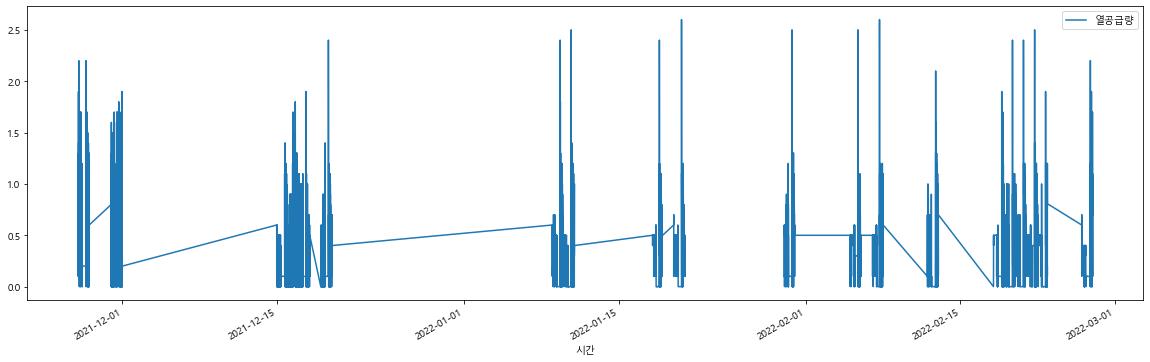

In [354]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
null_ymd_df.set_index("시간")["열공급량(kWh)"].plot(ax=ax,label="열공급량")
plt.legend()

# 결측 발생 패턴이 존재하나..?

2월 19일 결측치 확인

In [374]:
null_ymd_df[(null_ymd_df["년월일"] == "2022-02-19") & (null_ymd_df["열공급량(kWh)"].isnull())]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
118160,2022-02-19 01:20:00,2022-02-19,2022,2,19,1,20,-2.6,0.5,63,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
118161,2022-02-19 01:21:00,2022-02-19,2022,2,19,1,21,-2.6,0.4,64,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
118162,2022-02-19 01:22:00,2022-02-19,2022,2,19,1,22,-2.6,0.4,64,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
118163,2022-02-19 01:23:00,2022-02-19,2022,2,19,1,23,-2.5,0.4,65,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
118164,2022-02-19 01:24:00,2022-02-19,2022,2,19,1,24,-2.6,0.4,65,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119515,2022-02-19 23:55:00,2022-02-19,2022,2,19,23,55,-2.4,1.6,46,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
119516,2022-02-19 23:56:00,2022-02-19,2022,2,19,23,56,-2.4,1.6,46,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
119517,2022-02-19 23:57:00,2022-02-19,2022,2,19,23,57,-2.6,1.6,47,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
119518,2022-02-19 23:58:00,2022-02-19,2022,2,19,23,58,-2.7,1.5,47,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN


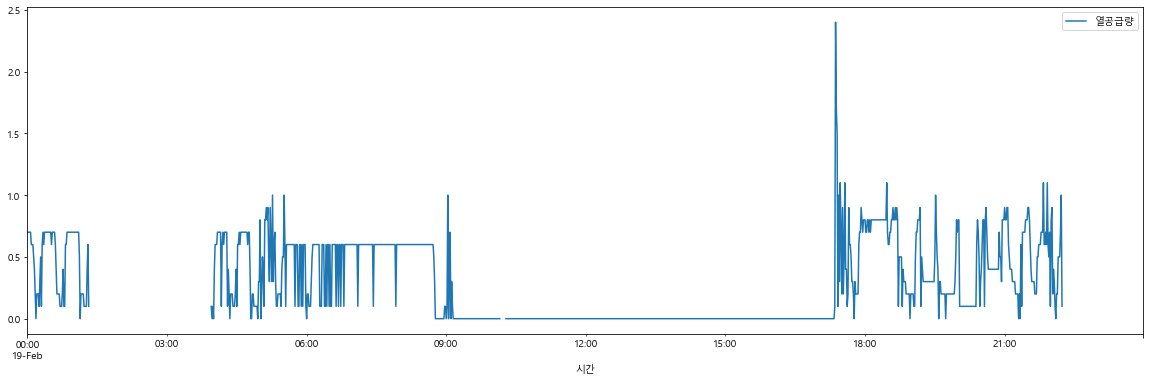

In [375]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
null_ymd_df[(null_ymd_df["년월일"] == "2022-02-19")].set_index("시간")["열공급량(kWh)"].plot(
    ax=ax,label="열공급량")
plt.legend()

# 결측 발생 패턴이 존재하나..?

null_ymd 결측확인

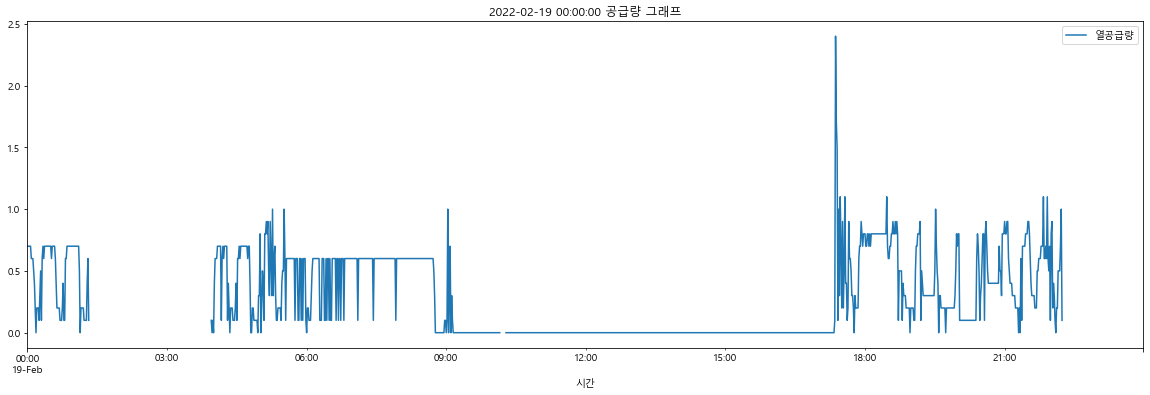

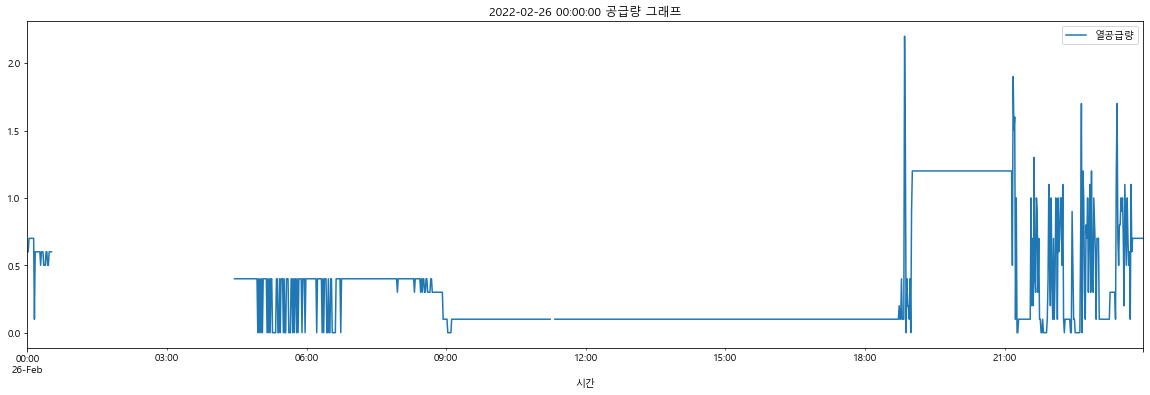

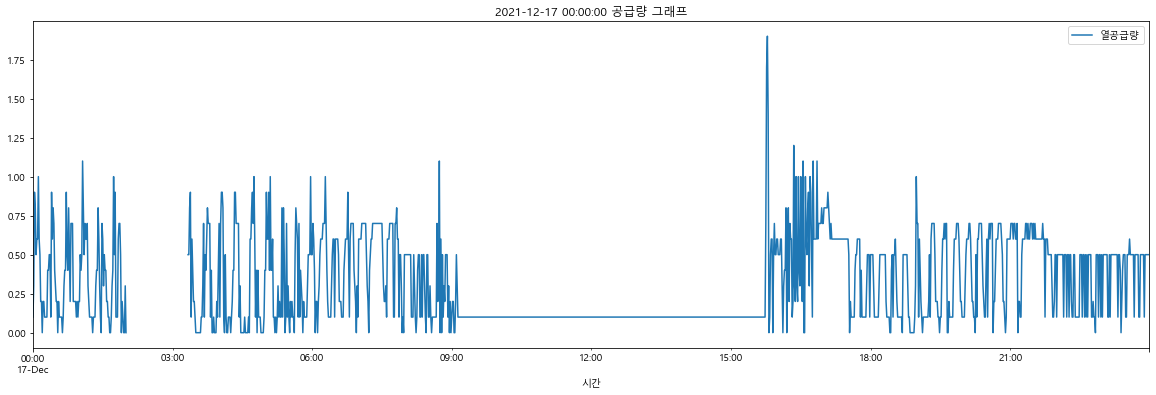

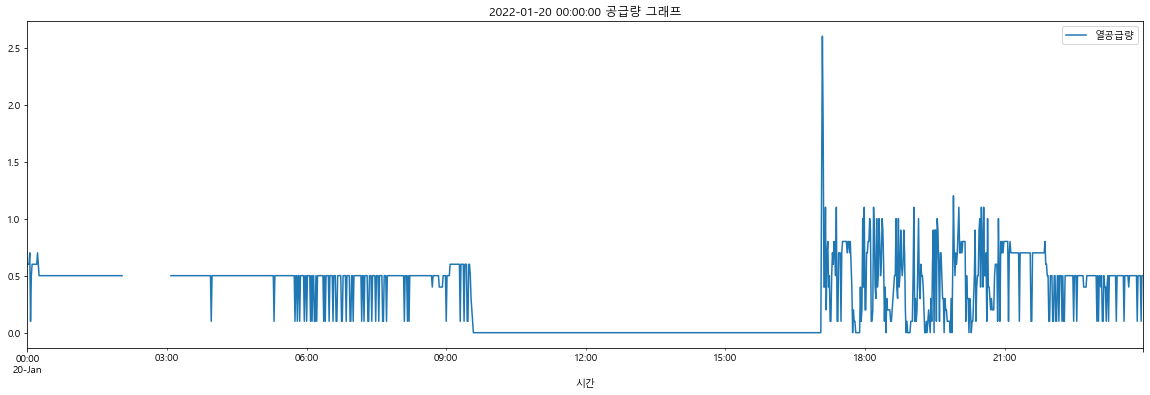

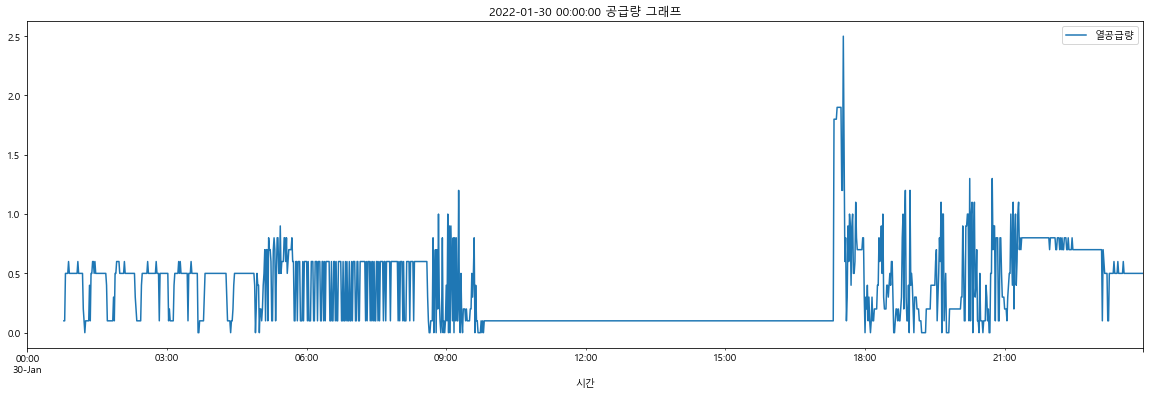

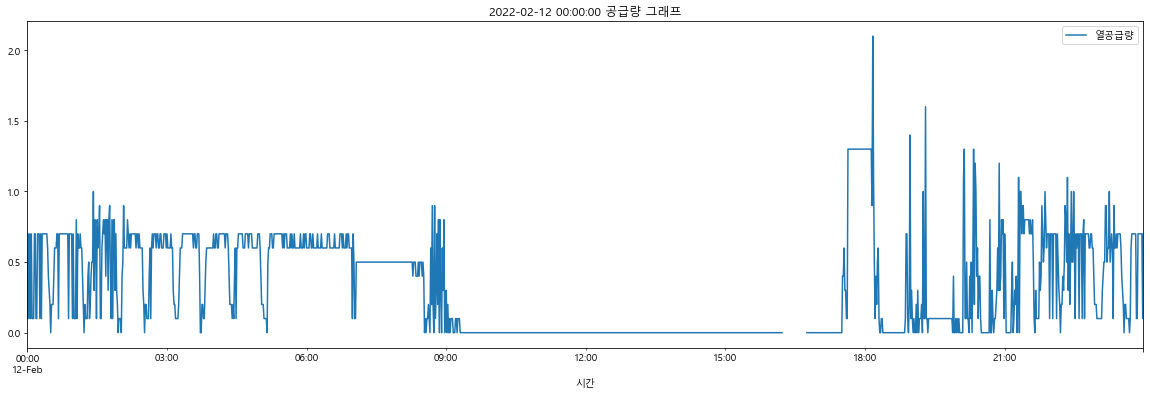

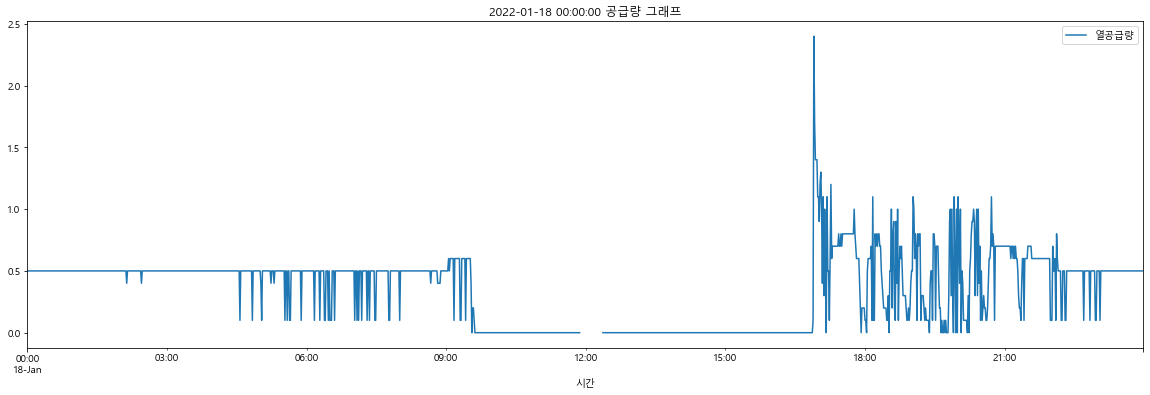

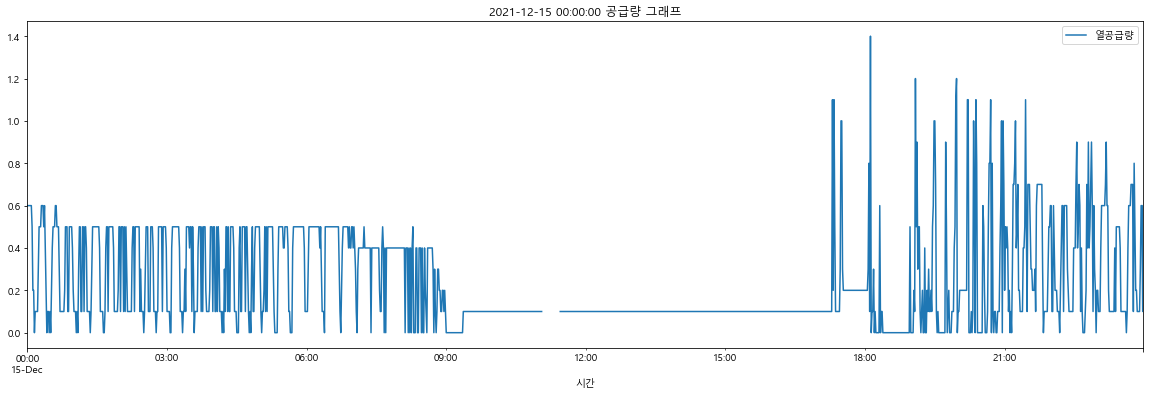

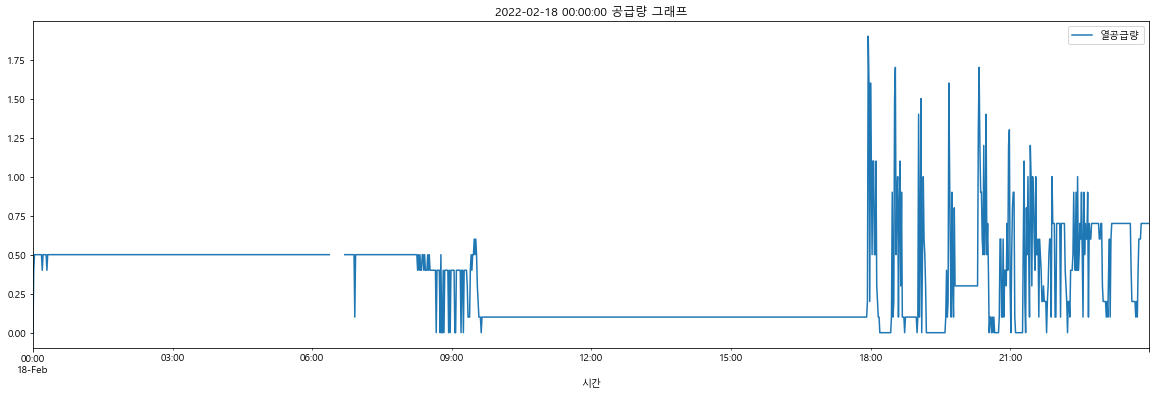

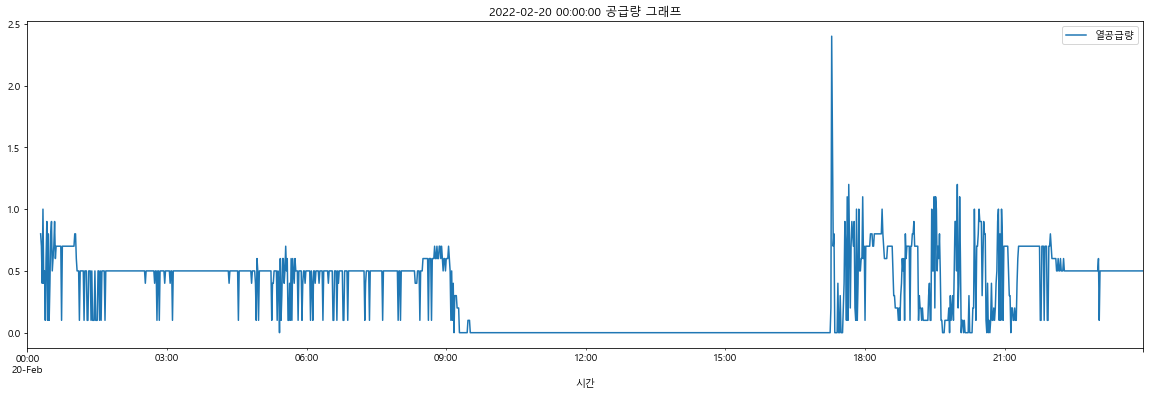

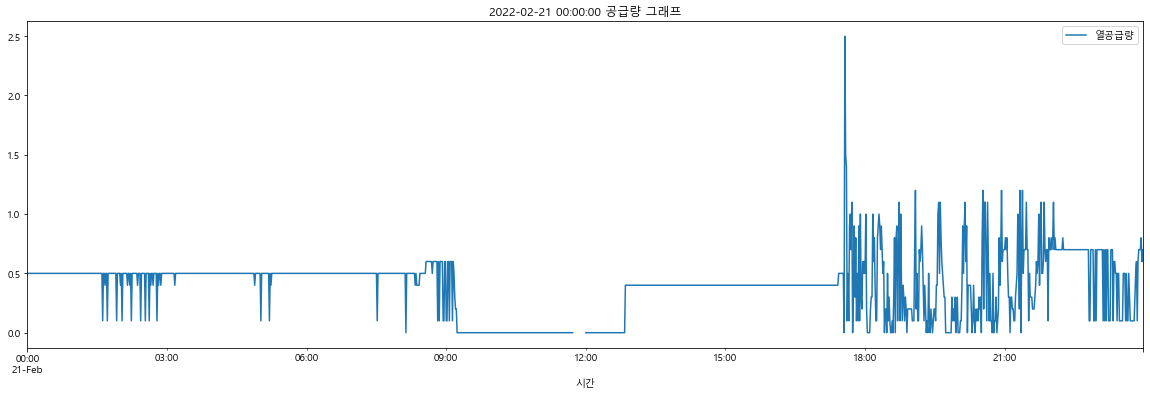

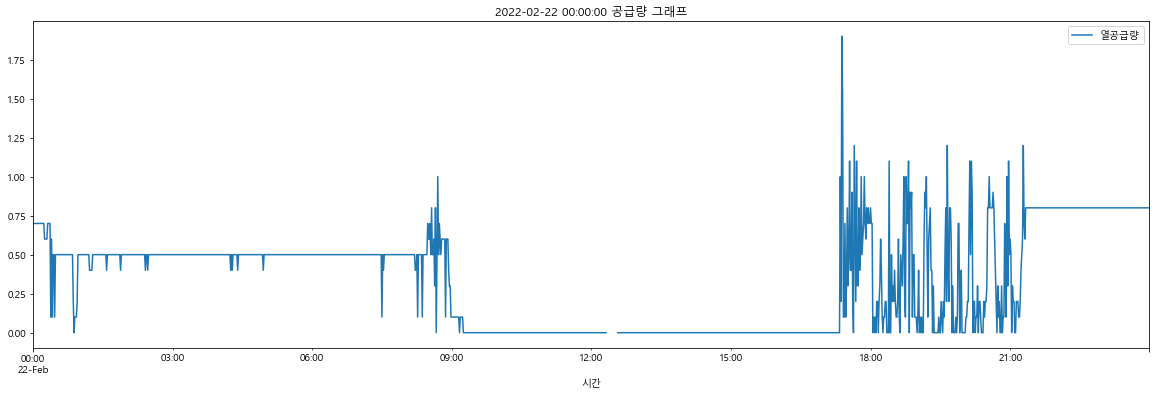

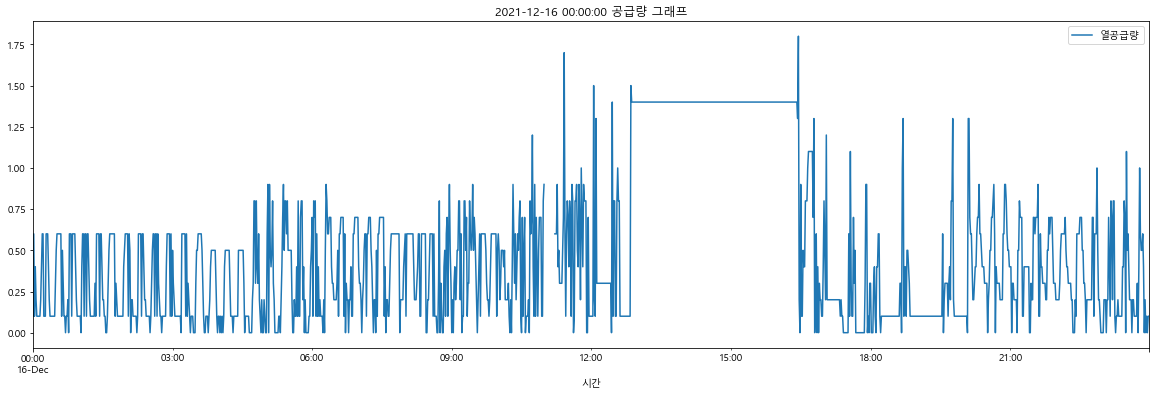

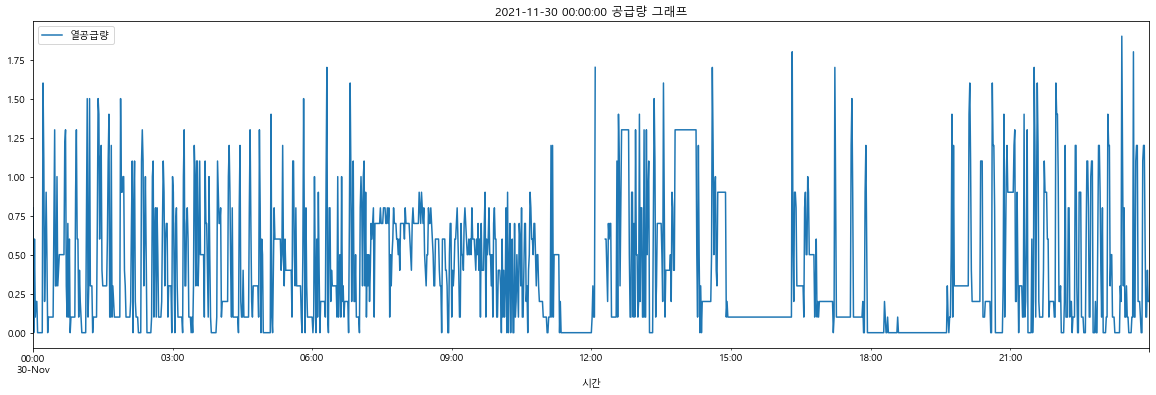

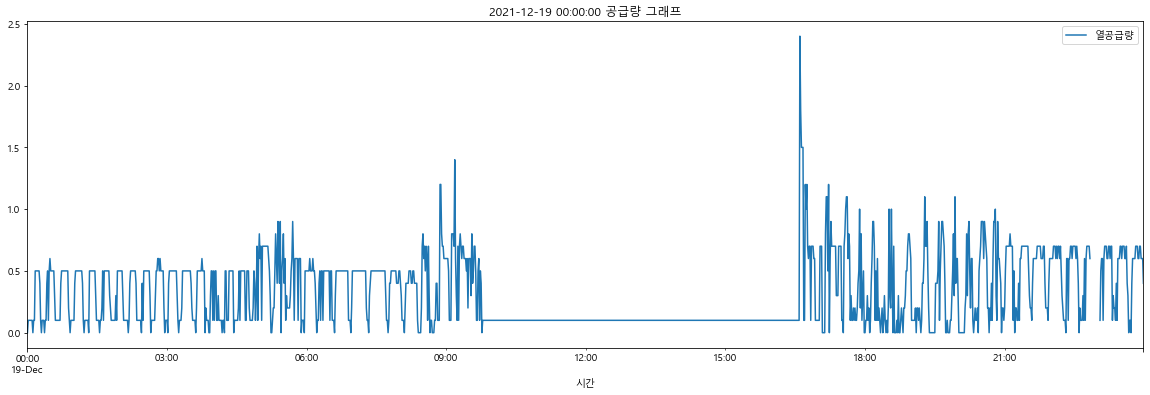

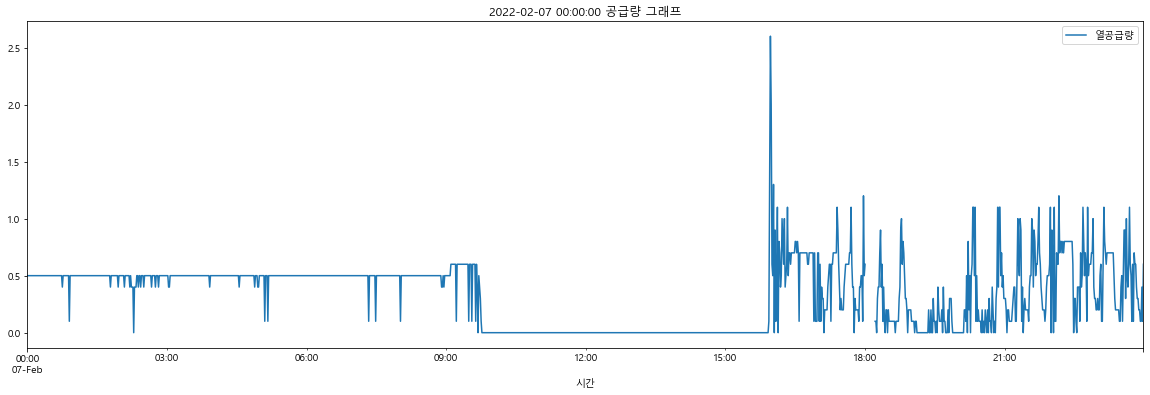

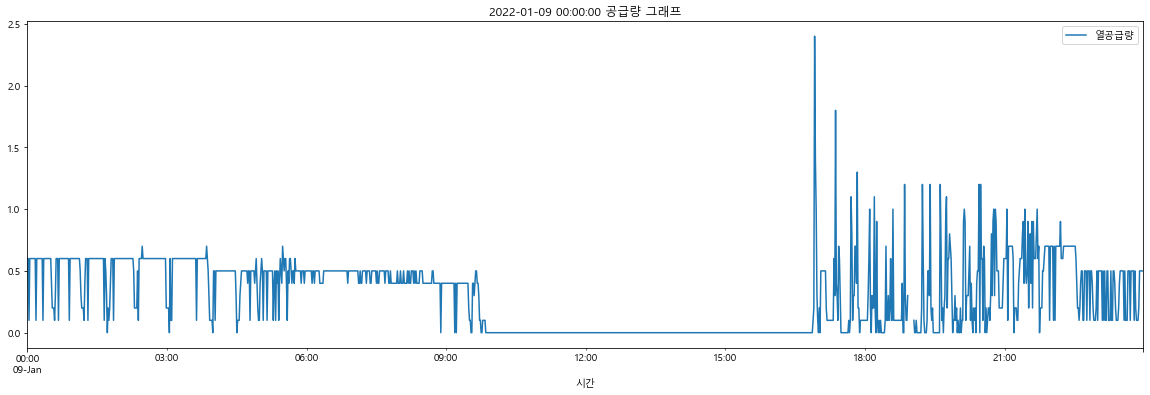

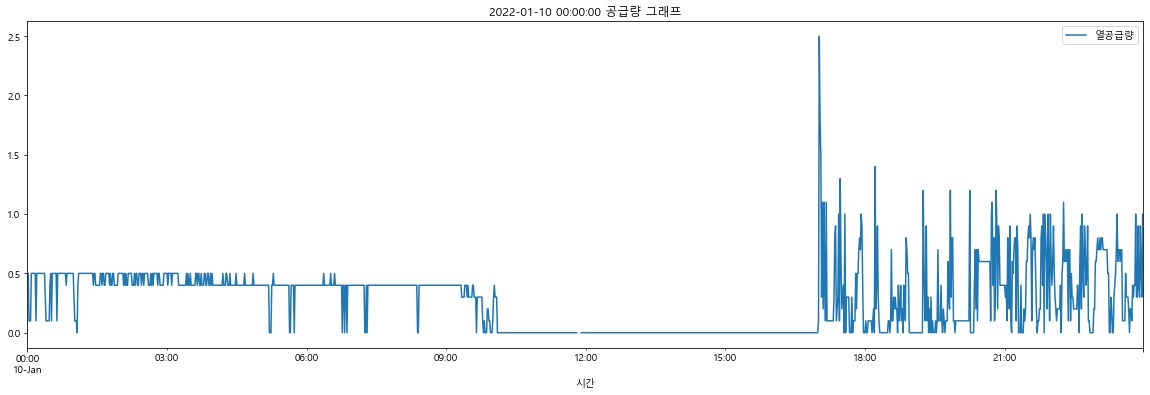

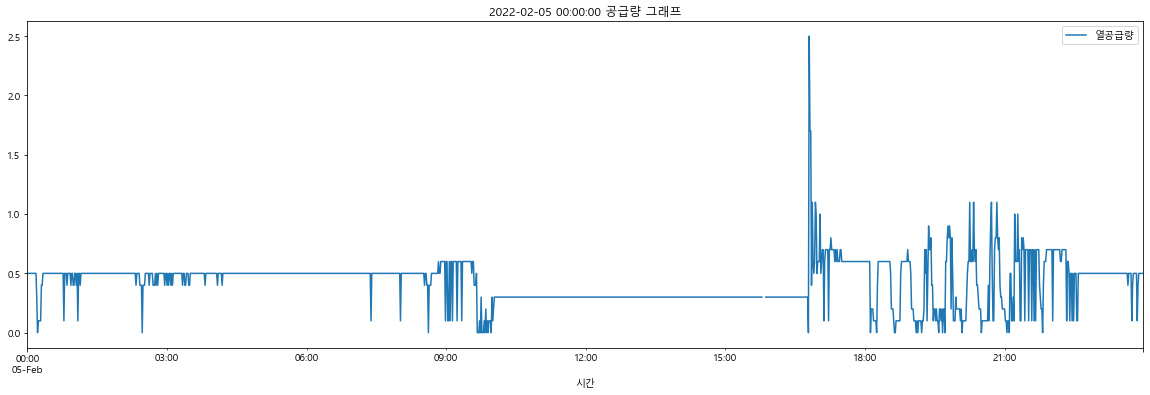

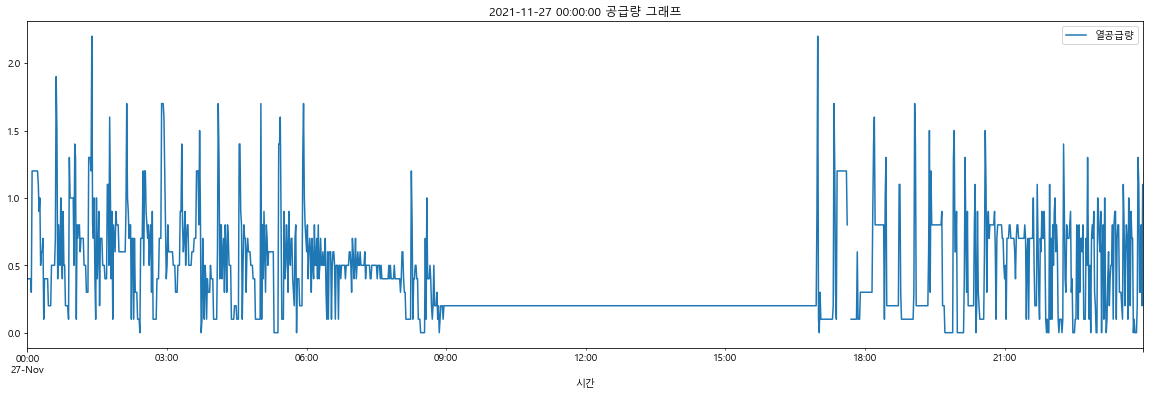

In [355]:
for date in null_ymd:
    fig,ax = plt.subplots(1,1,figsize=(20,6))
    train_df[train_df["년월일"] == date].set_index("시간")["열공급량(kWh)"].plot(ax=ax,label="열공급량")
    plt.title(str(date)+" 공급량 그래프")
    plt.legend()

KDE plot 확인

Text(0.5, 1.0, '열공급량 : 분포그래프 KDE plot')

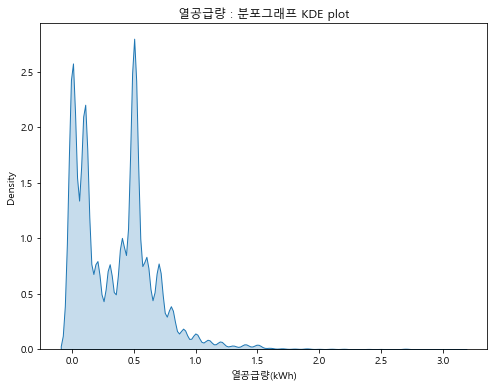

In [310]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.kdeplot(train_df["열공급량(kWh)"],shade=True, ax=ax)
plt.title("열공급량" + " : 분포그래프 KDE plot")

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
2498,2021-11-27 17:38:00,2021-11-27,2021,11,27,17,38,-4.8,9.2,32,...,100.0,0.0,0.0,0.0,0.0,1.0,1.0,27.0,18.2,NaN
2499,2021-11-27 17:39:00,2021-11-27,2021,11,27,17,39,-4.6,9.2,32,...,100.0,0.0,0.0,0.0,0.0,1.0,1.0,27.0,18.1,NaN
2500,2021-11-27 17:40:00,2021-11-27,2021,11,27,17,40,-4.4,9.1,33,...,100.0,0.0,0.0,0.0,0.0,1.0,1.0,27.0,18.1,NaN
2501,2021-11-27 17:41:00,2021-11-27,2021,11,27,17,41,-4.2,9.0,33,...,100.0,0.0,0.0,0.0,0.0,1.0,1.0,27.0,18.1,NaN
6486,2021-11-30 12:06:00,2021-11-30,2021,11,30,12,6,21.2,8.9,93,...,100.0,100.0,100.0,0.0,0.0,1.0,1.0,30.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108675,2022-02-26 11:15:00,2022-02-26,2022,2,26,11,15,660.0,8.3,52,...,100.0,100.0,100.0,1.0,37.0,1.0,0.0,30.0,20.0,NaN
108676,2022-02-26 11:16:00,2022-02-26,2022,2,26,11,16,660.0,8.4,52,...,100.0,100.0,100.0,1.0,34.0,1.0,0.0,30.0,20.0,NaN
108677,2022-02-26 11:17:00,2022-02-26,2022,2,26,11,17,660.0,8.4,52,...,100.0,100.0,100.0,1.0,27.0,1.0,0.0,30.0,20.0,NaN
108678,2022-02-26 11:18:00,2022-02-26,2022,2,26,11,18,668.0,8.5,51,...,100.0,100.0,100.0,1.0,27.0,0.0,0.0,30.0,20.0,NaN


In [264]:
train_df[(train_df["열공급량(kWh)"] == 0) | (train_df["열공급량(kWh)"].isnull())].to_csv("test.csv",encoding="utf-8-sig")

### 2) x값 결측치 확인

내부 온도부터 팬코일 B동까지 전부 null인 데이터 : 512개

In [214]:
# 내부온도가 null인 512개 데이터 제거하고 다시한번 null 확인
train_df[train_df["내부 온도"].notnull()].isnull().sum()

시간                   0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도                0
내부 습도                0
차광스크린(수평)            0
차열스크린(수평)            0
에너지스크린(수평)           0
에너지스크린(수직)           0
배기팬                  0
천창                   0
유동팬                  0
팬코일 B동               0
환기온도(천창 제어온도)      135
난방온도(설정온도)         134
열공급량(kWh)        21046
dtype: int64

In [217]:
train_df[train_df["내부 온도"].isnull()].head()

,시간,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),풍속(m/s),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
290,2021-11-26 04:50:00,2021,11,26,4,50,-3.9,2.1,79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9
291,2021-11-26 04:51:00,2021,11,26,4,51,-3.7,2.1,79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3
292,2021-11-26 04:52:00,2021,11,26,4,52,-3.7,2.1,78,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8
883,2021-11-26 14:43:00,2021,11,26,14,43,414.0,13.7,20,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
884,2021-11-26 14:44:00,2021,11,26,14,44,410.0,13.7,20,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1


음수 깨지기 방지

In [242]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

KDE plot

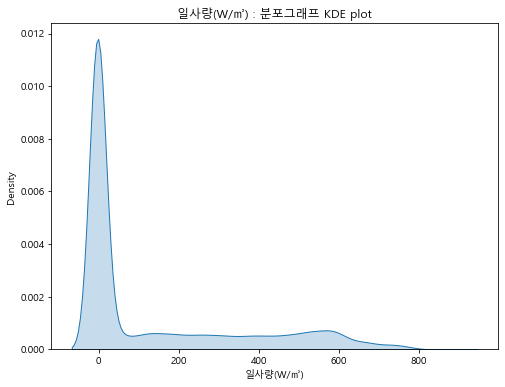

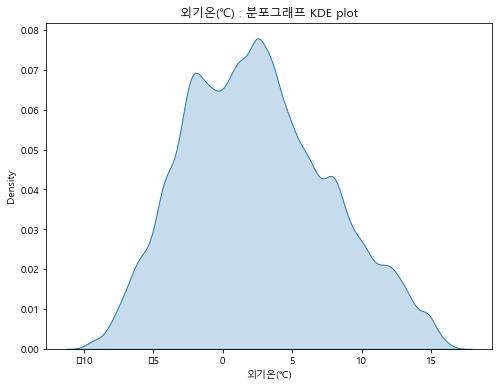

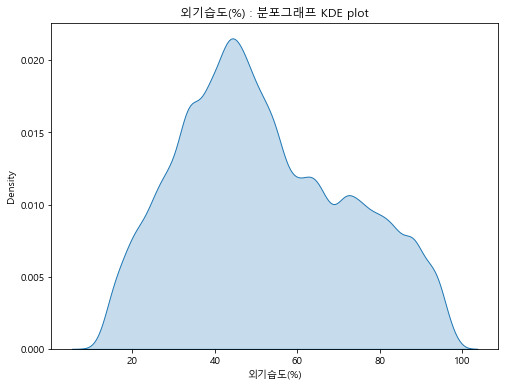

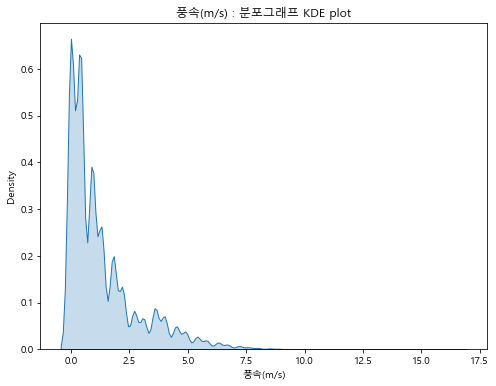

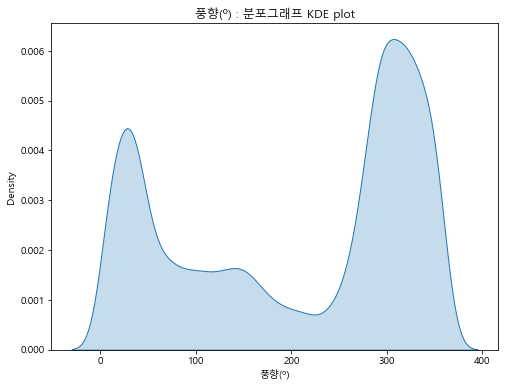

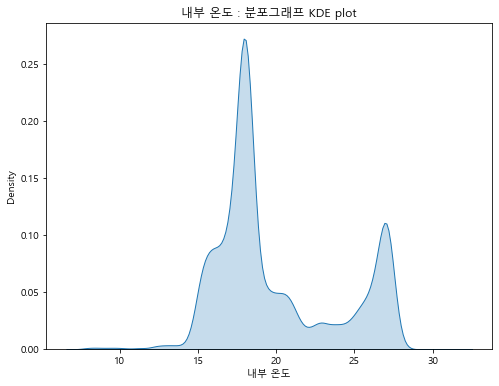

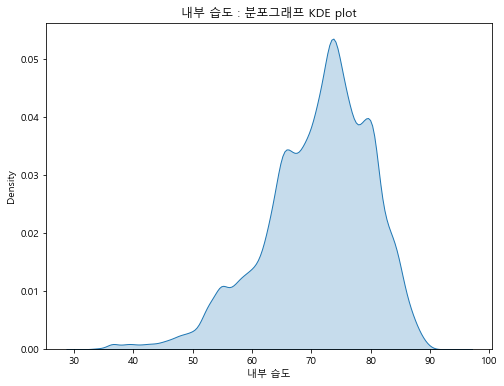

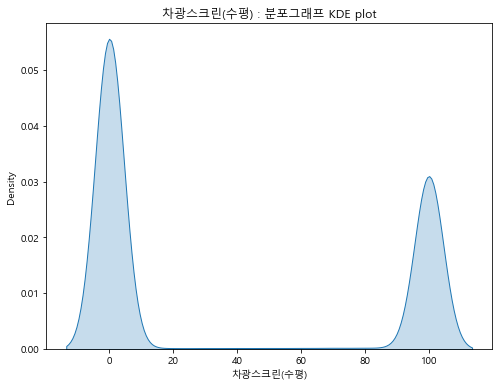

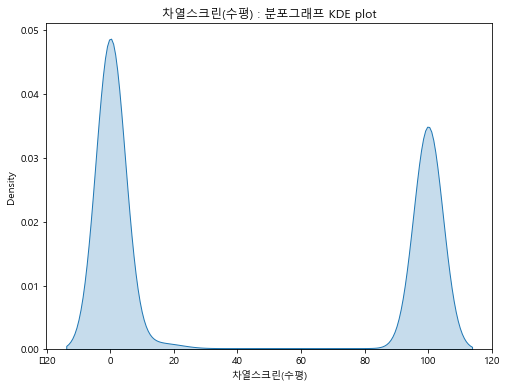

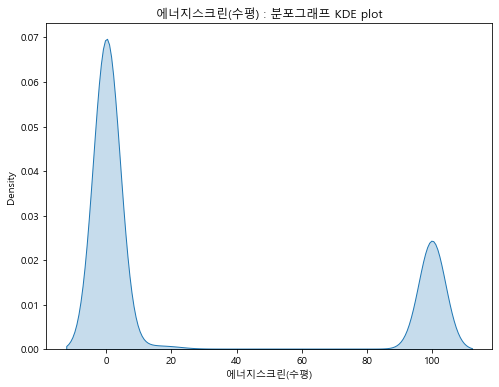

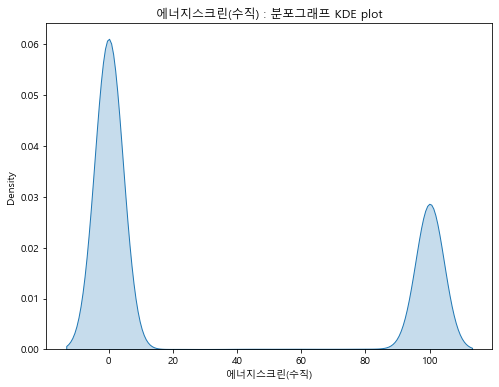

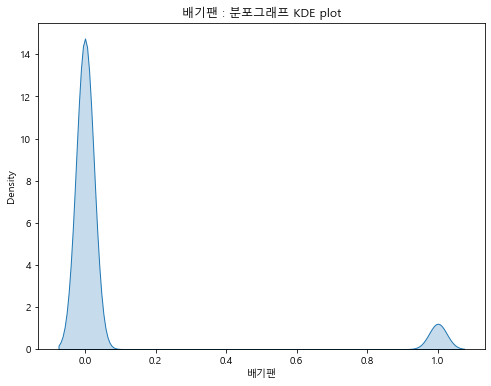

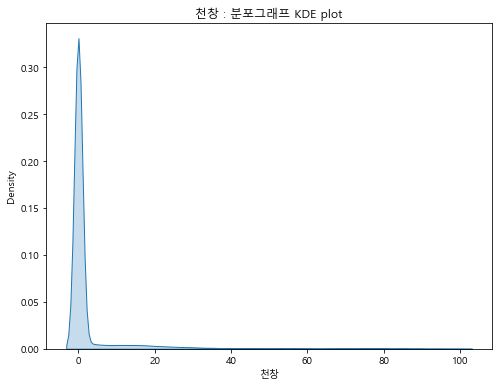

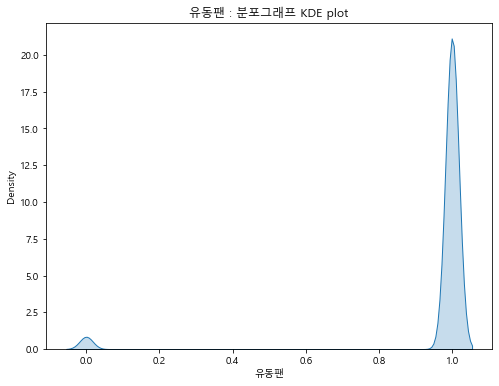

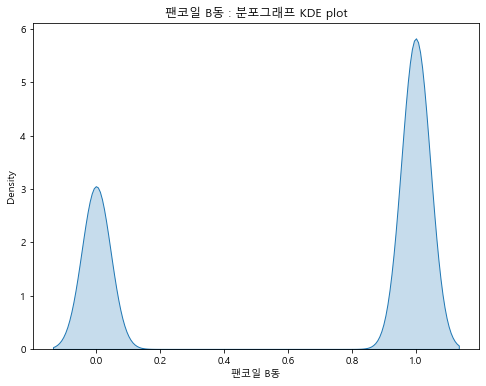

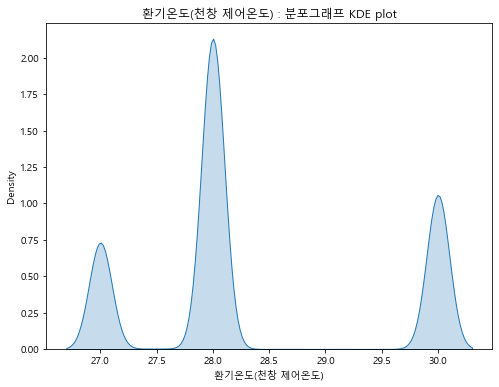

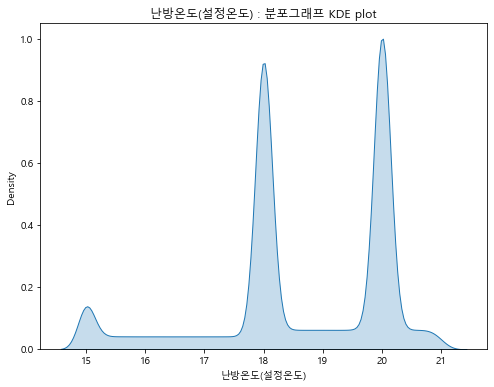

In [230]:
for col in train_df.columns[6:-1]:
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    sns.kdeplot(train_df[col],shade=True, ax=ax)
    plt.title(col + " : 분포그래프 KDE plot")

시계열 그래프

In [233]:
range3 = pd.date_range(start="2021-11-26",end="2021-12-25")
range4 = pd.date_range(start="2022-01-02",end="2022-01-22")
range5 = pd.date_range(start="2022-01-30",end="2022-02-08")

range3_df = train_df[(train_df["시간"].isin(range3))]
range4_df = train_df[(train_df["시간"].isin(range4))]
range5_df = train_df[(train_df["시간"].isin(range5))]

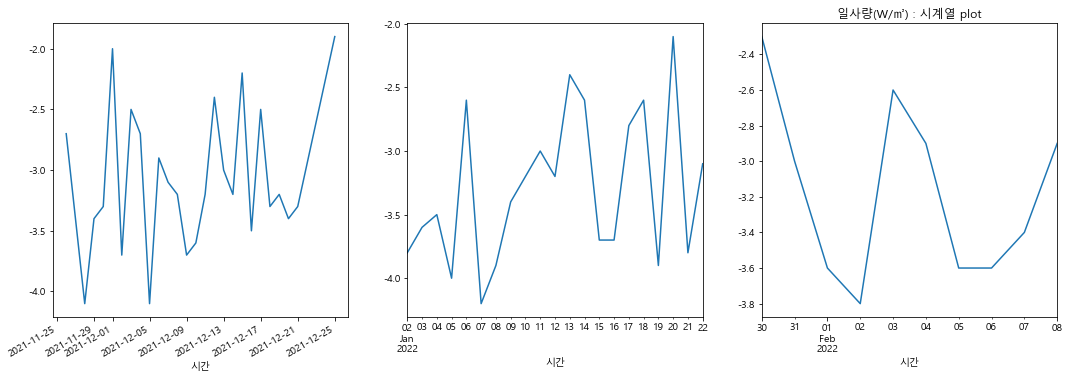

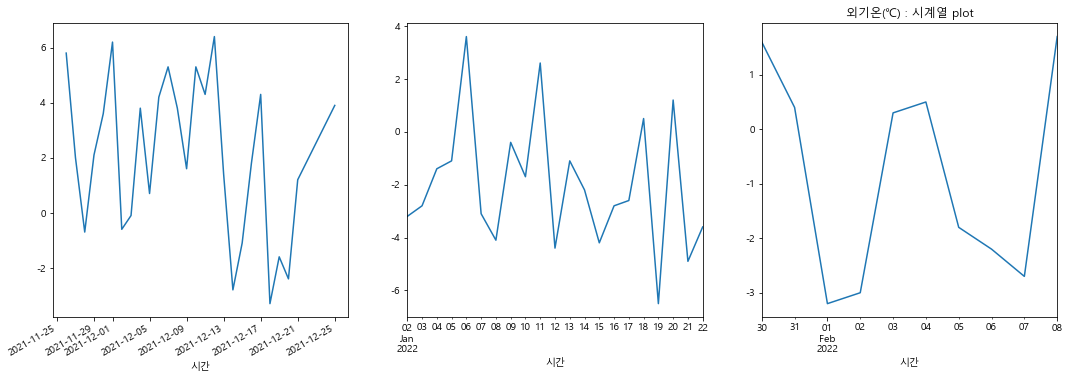

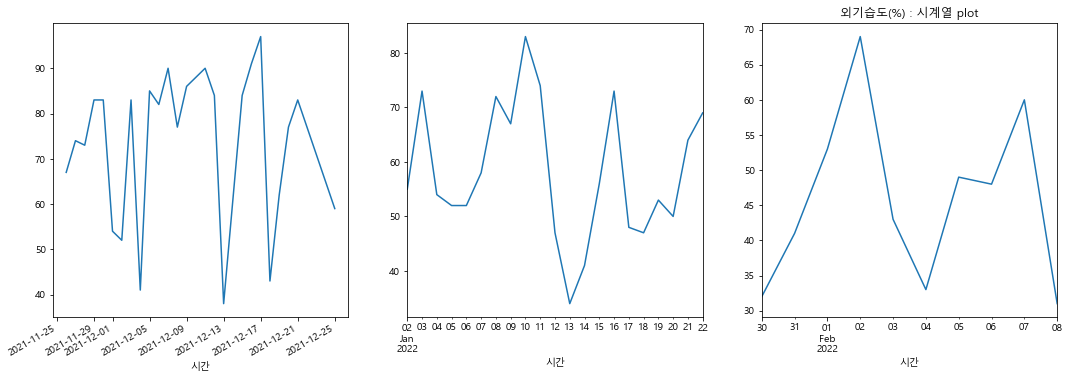

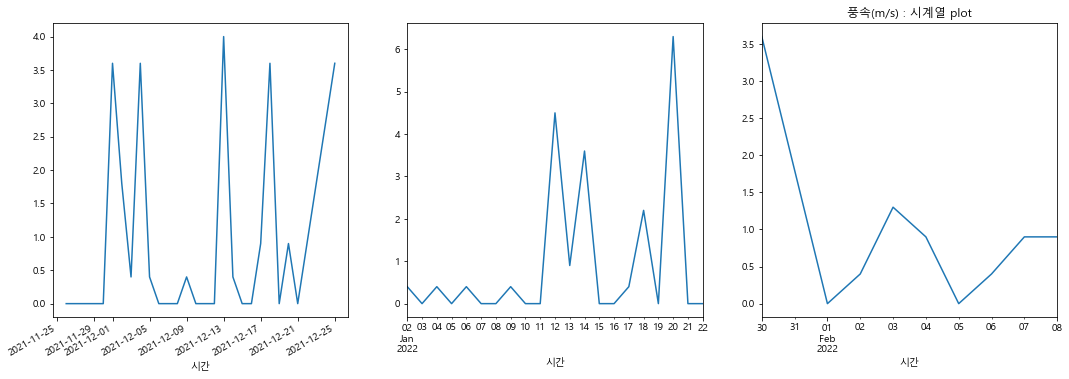

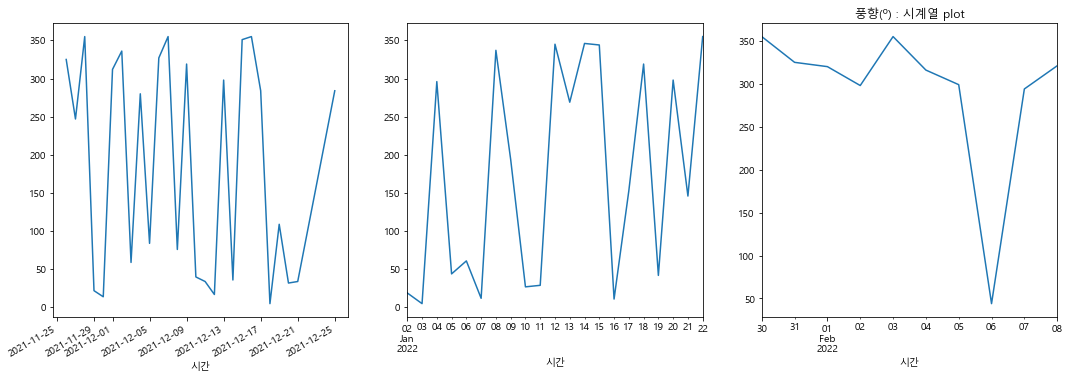

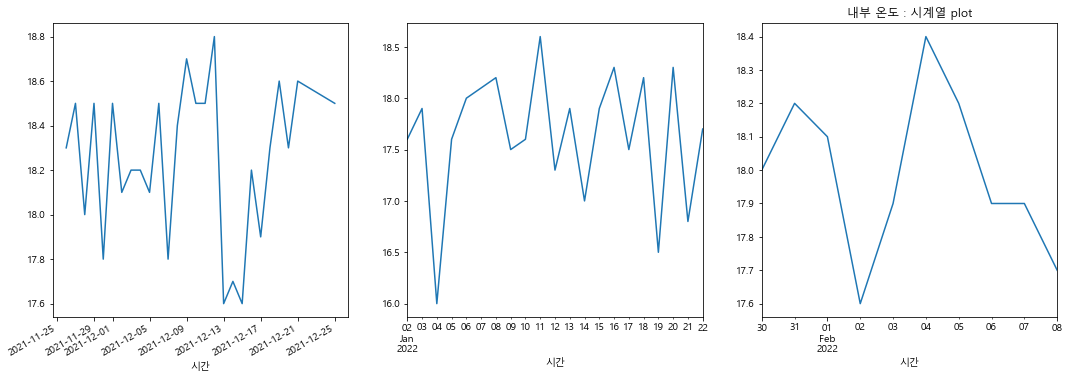

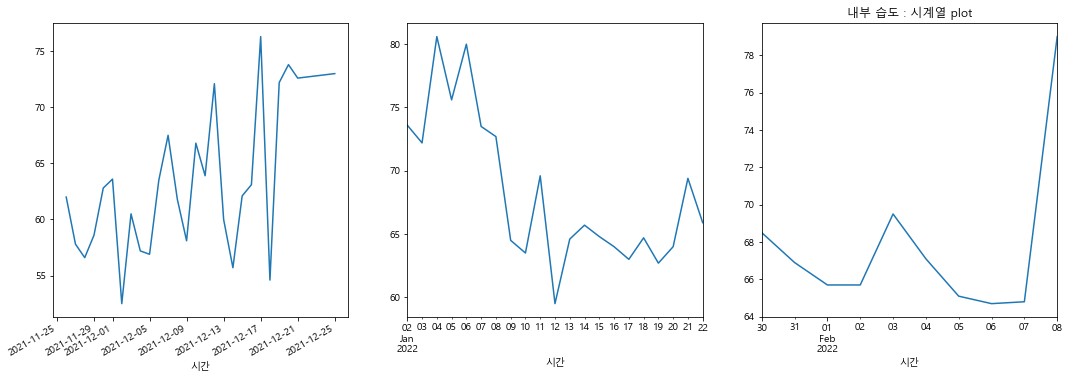

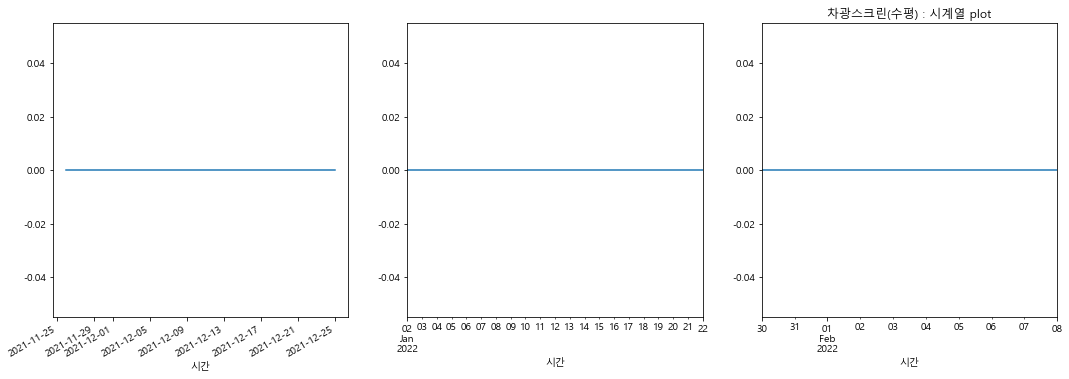

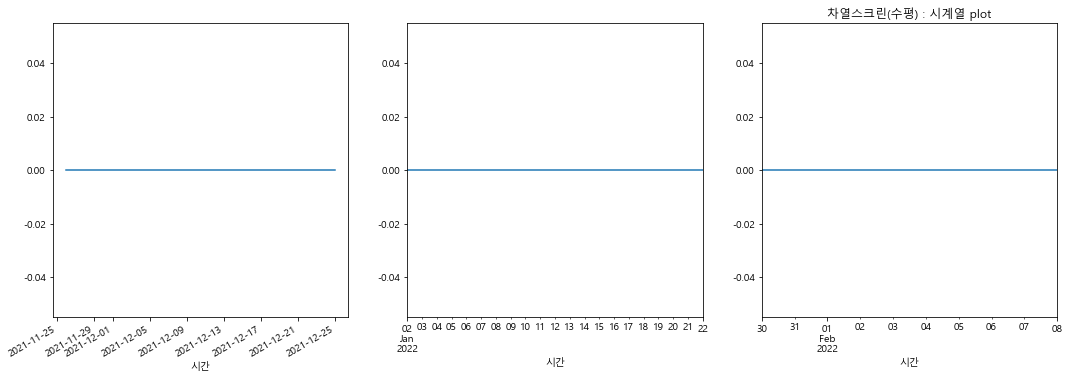

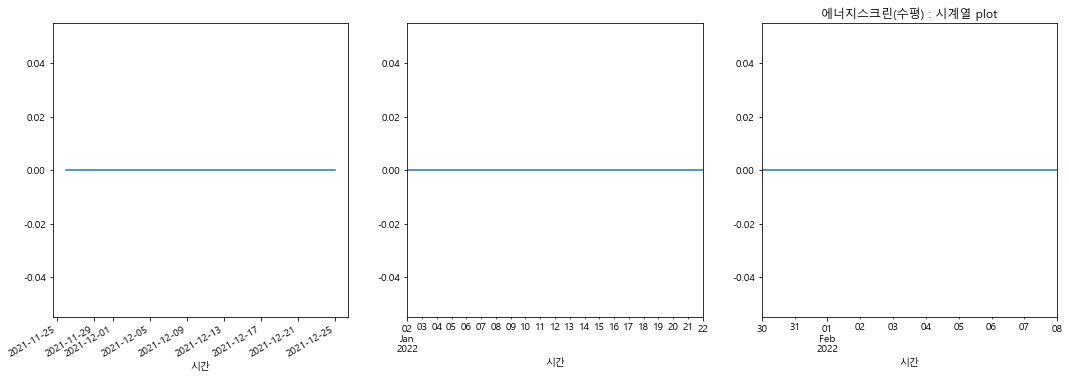

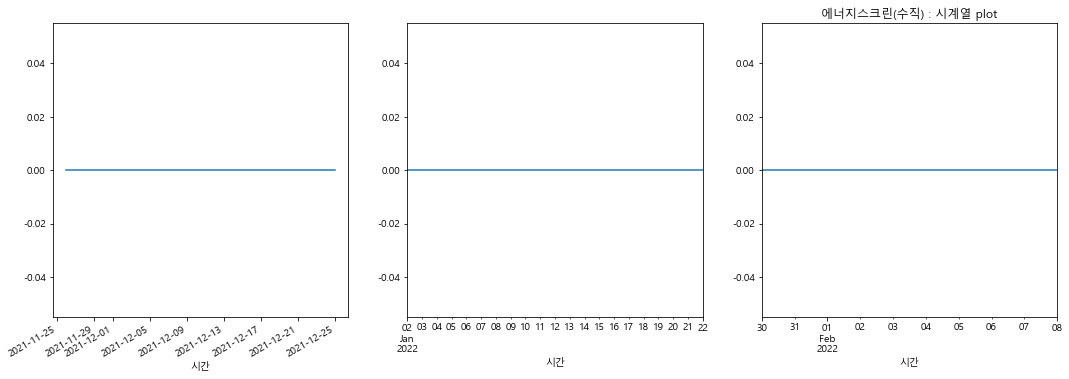

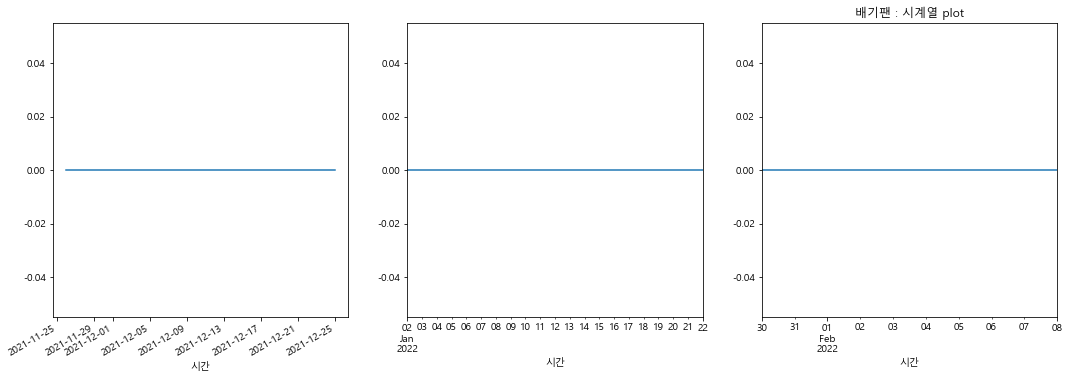

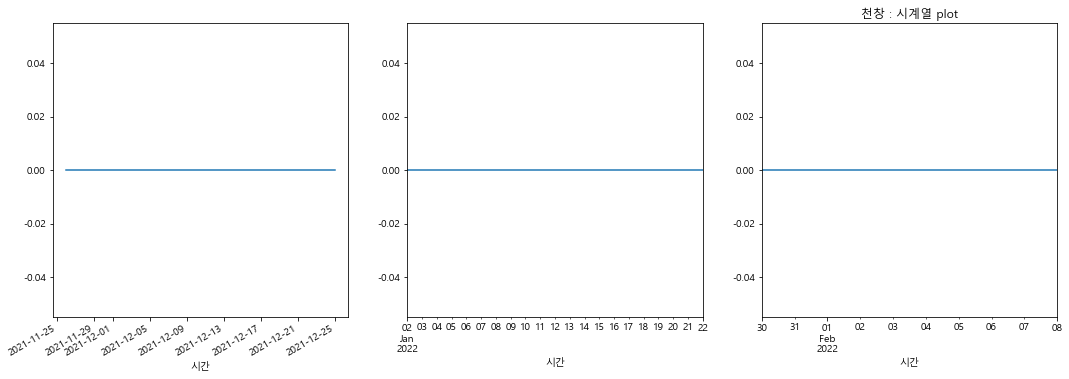

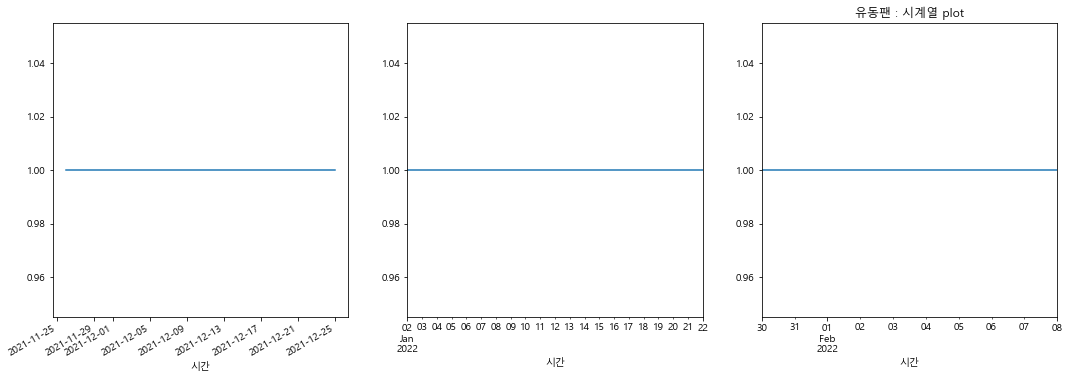

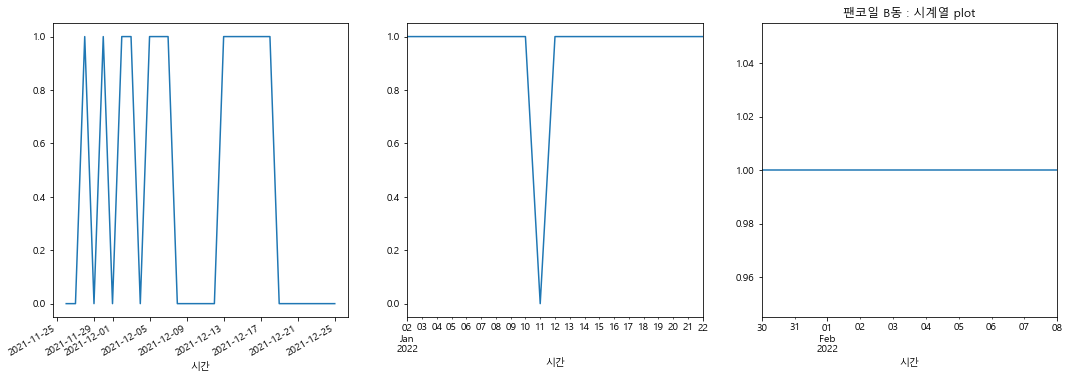

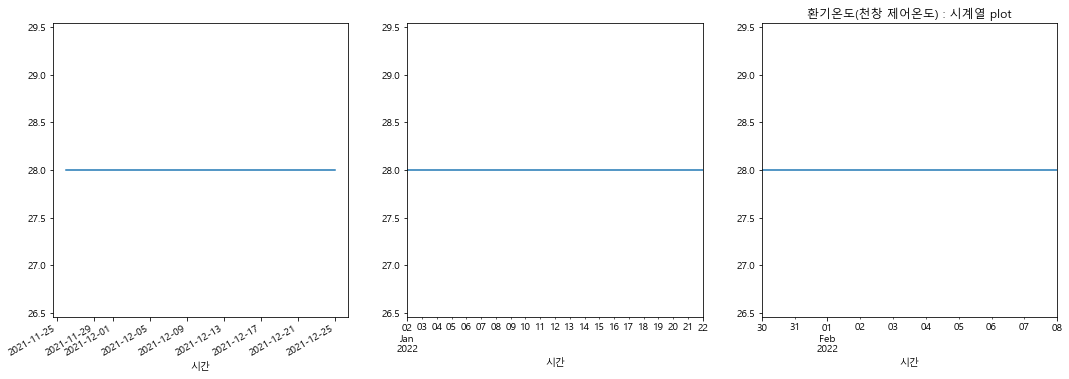

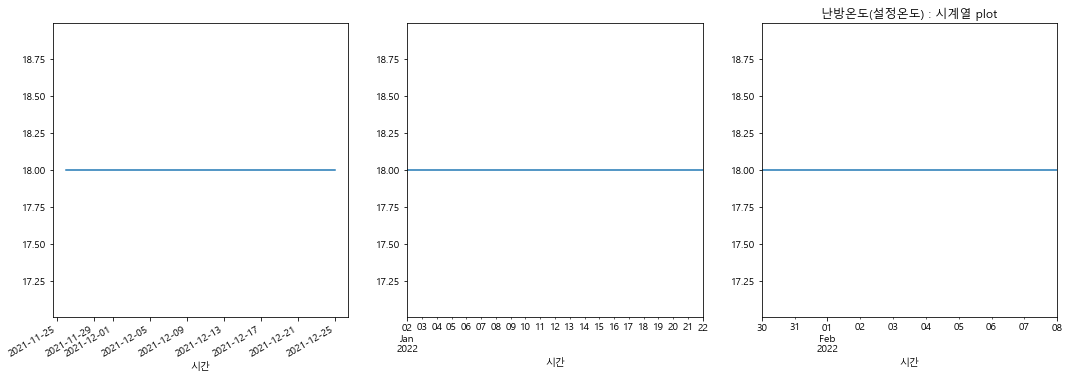

In [243]:
for col in train_df.columns[6:-1]:
    fig,ax = plt.subplots(1,3,figsize=(18,6))
    
    range3_df.set_index("시간")[col].plot(ax=ax[0],label=col)
    plt.title(col + " : 시계열 plot")
    
    range4_df.set_index("시간")[col].plot(ax=ax[1],label=col)

    
    range5_df.set_index("시간")[col].plot(ax=ax[2],label=col)
    

- 시간, 계절에 따른 범주화 변수를 추가해주면 어떨까 싶다

상관관계 확인

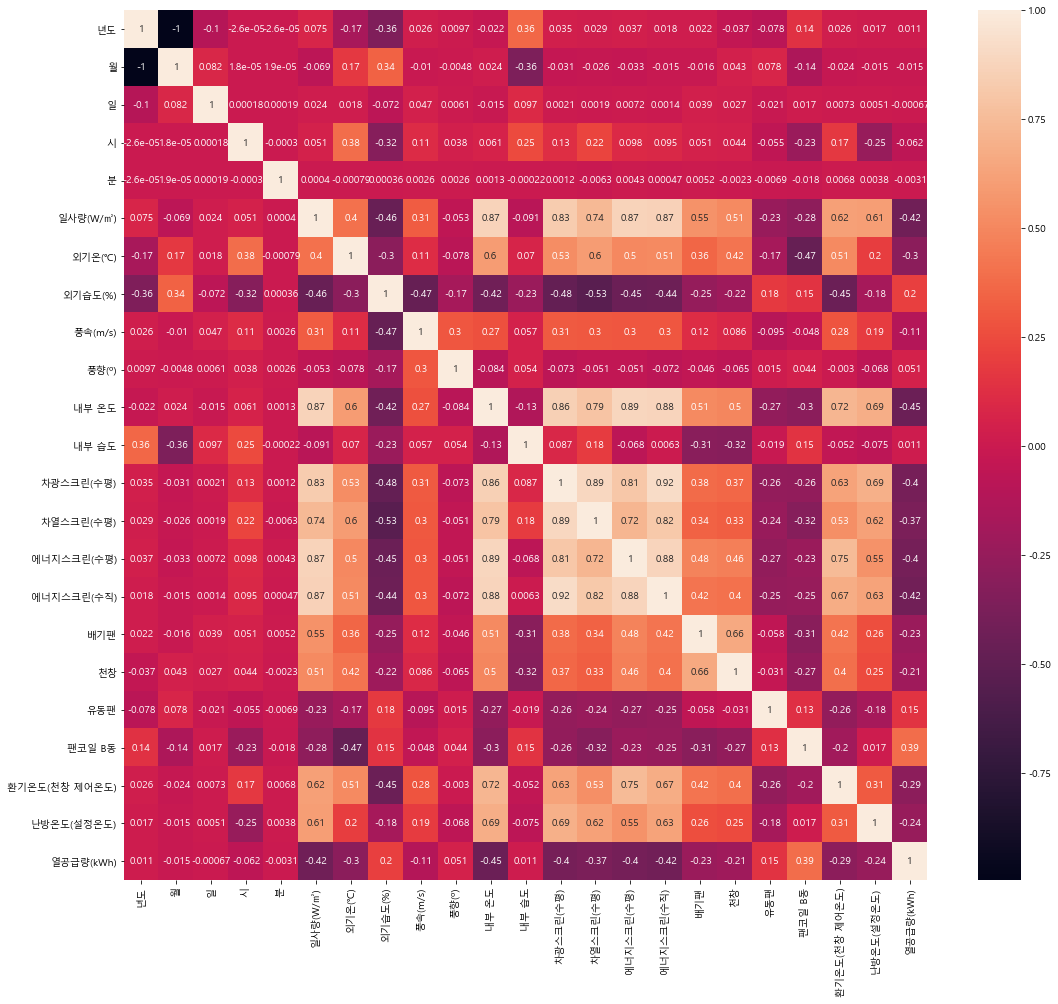

In [250]:
corr_df = train_df.corr(method='pearson')
plt.figure(figsize=(18, 16))
sns.heatmap(corr_df, annot=True)
plt.show()

# 상관관계가 기존의 열들 사이에서는 그리 높지 않게 나타남. 0.9 넘는 것 없음